In [2]:
%matplotlib inline

# Extract segmentation features

This example shows how to extract segmentation features from the tissue
image.

Features extracted from a nucleus segmentation range from the number of
nuclei per image, over nuclei shapes and sizes, to the intensity of the
input channels within the segmented objects. They are very interpretable
features and provide valuable additional information. Segmentation
features are calculated by using `features = 'segmentation'`, which
calls `squidpy.im.ImageContainer.features_segmentation`.

In addition to `feature_name` and `channels` we can specify the
following `features_kwargs`:

-   `label_layer` - name of label image layer in `img`.
-   `props` - segmentation features that are calculated. See
    [properties]{.title-ref} in `skimage.measure.regionprops_table`.

::: seealso
-   `sphx_glr_auto_examples_image_compute_segment_fluo.py` for more
    details on calculating a cell-segmentation.
-   `sphx_glr_auto_examples_image_compute_features.py` for the general
    usage of `squidpy.im.calculate_image_features`.
:::


In [1]:
import squidpy as sq

import matplotlib.pyplot as plt

First, let\'s load the fluorescence Visium dataset.


In [3]:
img = sq.datasets.visium_fluo_image_crop()
adata = sq.datasets.visium_fluo_adata_crop()

In [4]:
img

ImageContainer[shape=(7272, 7272), layers=['image']]

In [5]:
adata

AnnData object with n_obs × n_vars = 704 × 16562
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

Before calculating segmentation features, we need to first calculate a
segmentation using `squidpy.im.segment`.


In [6]:
sq.im.segment(img=img, layer="image", layer_added="segmented_watershed", method="watershed", channel=0)

> IDF: No smoothing of the image before segmentation?

Now we can calculate segmentation features. Here, we will calculate the
following features:

> -   number of nuclei `label`.
> -   mean area of nuclei `area`.
> -   mean intensity of channels 1 (anti-NEUN) and 2 (anti-GFAP) within
>     nuclei `mean_intensity`.

We use `mask_cicle = True` to ensure that we are only extracting
features from the tissue underneath each Visium spot. For more details
on the image cropping, see
`sphx_glr_auto_examples_image_compute_crops.py`.


In [7]:
sq.im.calculate_image_features(
    adata,
    img,
    layer="image",
    features="segmentation",
    key_added="segmentation_features",
    features_kwargs={
        "segmentation": {
            "label_layer": "segmented_watershed",
            "props": ["label", "area", "mean_intensity"],
            "channels": [1, 2],
        }
    },
    mask_circle=True,
)

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 71%|██████████▋    | 499/704 [00:36<00:14, 14.10/s]/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/_methods.py:22

The result is stored in `adata.obsm['segmentation_features']`.


In [8]:
adata.obsm["segmentation_features"].head()

,segmentation_label,segmentation_area_mean,segmentation_area_std,segmentation_ch-1_mean_intensity_mean,segmentation_ch-1_mean_intensity_std,segmentation_ch-2_mean_intensity_mean,segmentation_ch-2_mean_intensity_std
AAACGAGACGGTTGAT-1,17,174.764706,291.276810,5604.069561,3100.506862,8997.290710,177.888882
AAAGGGATGTAGCAAG-1,14,100.785714,80.946348,5034.146353,1625.737796,10376.489346,564.254124
AAATGGCATGTCTTGT-1,16,132.000000,147.241723,11527.768307,12227.308457,7725.282284,947.987907
AAATGGTCAATGTGCC-1,9,243.000000,132.341310,3581.244911,46.124320,9664.505991,1331.259644
AAATTAACGGGTAGCT-1,7,229.142857,203.573383,9038.077440,8707.493743,10922.808071,3631.149215


Use `squidpy.pl.extract` to plot the texture features on the tissue
image or have a look at [our interactive visualization
tutorial](../../external_tutorials/tutorial_napari.ipynb) to learn how
to use our interactive `napari` plugin. Here, we show all calculated
segmentation features.


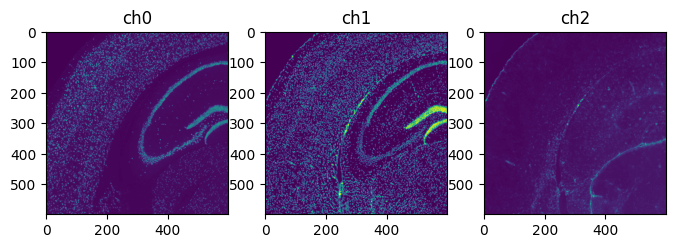

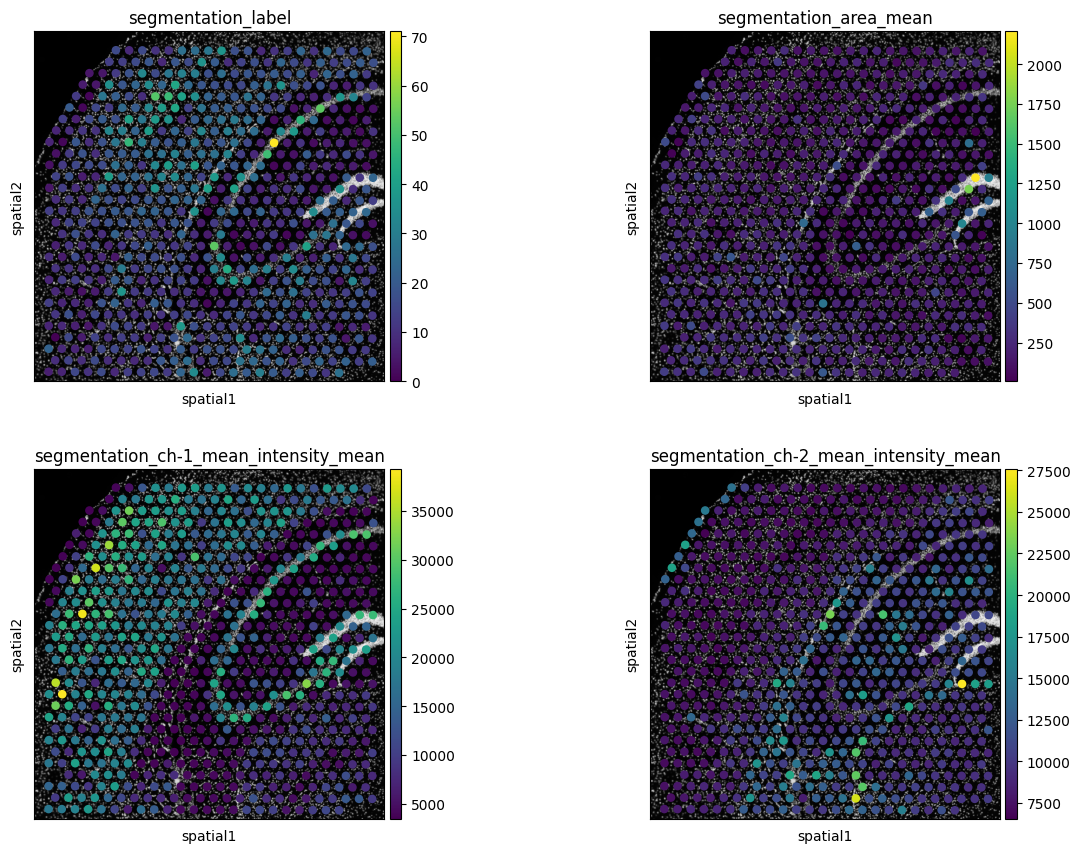

In [15]:
# show all channels (using low-res image contained in adata to save memory)
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
for i, ax in enumerate(axes):
    ax.imshow(adata.uns["spatial"]["V1_Adult_Mouse_Brain_Coronal_Section_2"]["images"]["hires"][:, :, i])
    ax.set_title(f"ch{i}")

# plot segmentation features
sq.pl.spatial_scatter(
    sq.pl.extract(adata, "segmentation_features"),
    color=[
        "segmentation_label",
        "segmentation_area_mean",
        "segmentation_ch-1_mean_intensity_mean",
        "segmentation_ch-2_mean_intensity_mean",
    ],
    img_cmap="gray",
    ncols=2,
)

[segmentation_label]{.title-ref} shows the number of nuclei per spot and
[segmentation_area_mean]{.title-ref} the mean are of nuclei per spot.
The remaining two plots show the mean intensity of channels 1 and 2 per
spot. As the stains for channels 1 and 2 are specific to Neurons and
Glial cells, respectively, these features show us Neuron and Glial cell
dense areas.


> IDF: parameter experimentation

In [20]:
sq.im.calculate_image_features(
    adata,
    img,
    layer='image',
    features='segmentation',
    features_kwargs={
            'segmentation': {
                'label_layer': 'segmented_watershed',
                'channels': [1, 2],
                'props': ['max_intensity', 'min_intensity', 'perimeter']
            }
    },
    mask_circle=True,
    key_added='segmentation_features2',
    n_jobs=8
)

100%|███████████████| 704/704 [00:41<00:00, 17.02/s]


In [22]:
adata.obsm['features_segmentation2'].head()

,segmentation_perimeter_mean,segmentation_perimeter_std,segmentation_ch-1_max_intensity_mean,segmentation_ch-1_max_intensity_std,segmentation_ch-1_mean_intensity_mean,segmentation_ch-1_mean_intensity_std,segmentation_ch-1_min_intensity_mean,segmentation_ch-1_min_intensity_std,segmentation_ch-2_max_intensity_mean,segmentation_ch-2_max_intensity_std,segmentation_ch-2_mean_intensity_mean,segmentation_ch-2_mean_intensity_std,segmentation_ch-2_min_intensity_mean,segmentation_ch-2_min_intensity_std
AAACGAGACGGTTGAT-1,47.353781,29.385379,6601.882353,4732.852913,5604.069561,3100.506862,4785.647059,1742.829104,10251.529412,1474.358649,8997.290710,177.888882,8269.647059,277.223406
AAAGGGATGTAGCAAG-1,34.794710,18.205905,5556.000000,1489.961840,5034.146353,1625.737796,4644.000000,1737.701602,13674.000000,2619.126463,10376.489346,564.254124,8824.857143,532.438441
AAATGGCATGTCTTGT-1,38.038582,24.347750,14787.750000,16555.035214,11527.768307,12227.308457,8702.750000,7701.610964,11260.000000,6068.865462,7725.282284,947.987907,6670.750000,398.872708
AAATGGTCAATGTGCC-1,56.880548,19.711803,3838.666667,44.181444,3581.244911,46.124320,3329.333333,92.529875,11910.222222,1889.653806,9664.505991,1331.259644,7846.666667,718.264575
AAATTAACGGGTAGCT-1,48.770274,29.998470,11467.428571,12249.179831,9038.077440,8707.493743,6158.857143,3773.498393,15546.857143,8257.390723,10922.808071,3631.149215,9479.428571,2747.714627


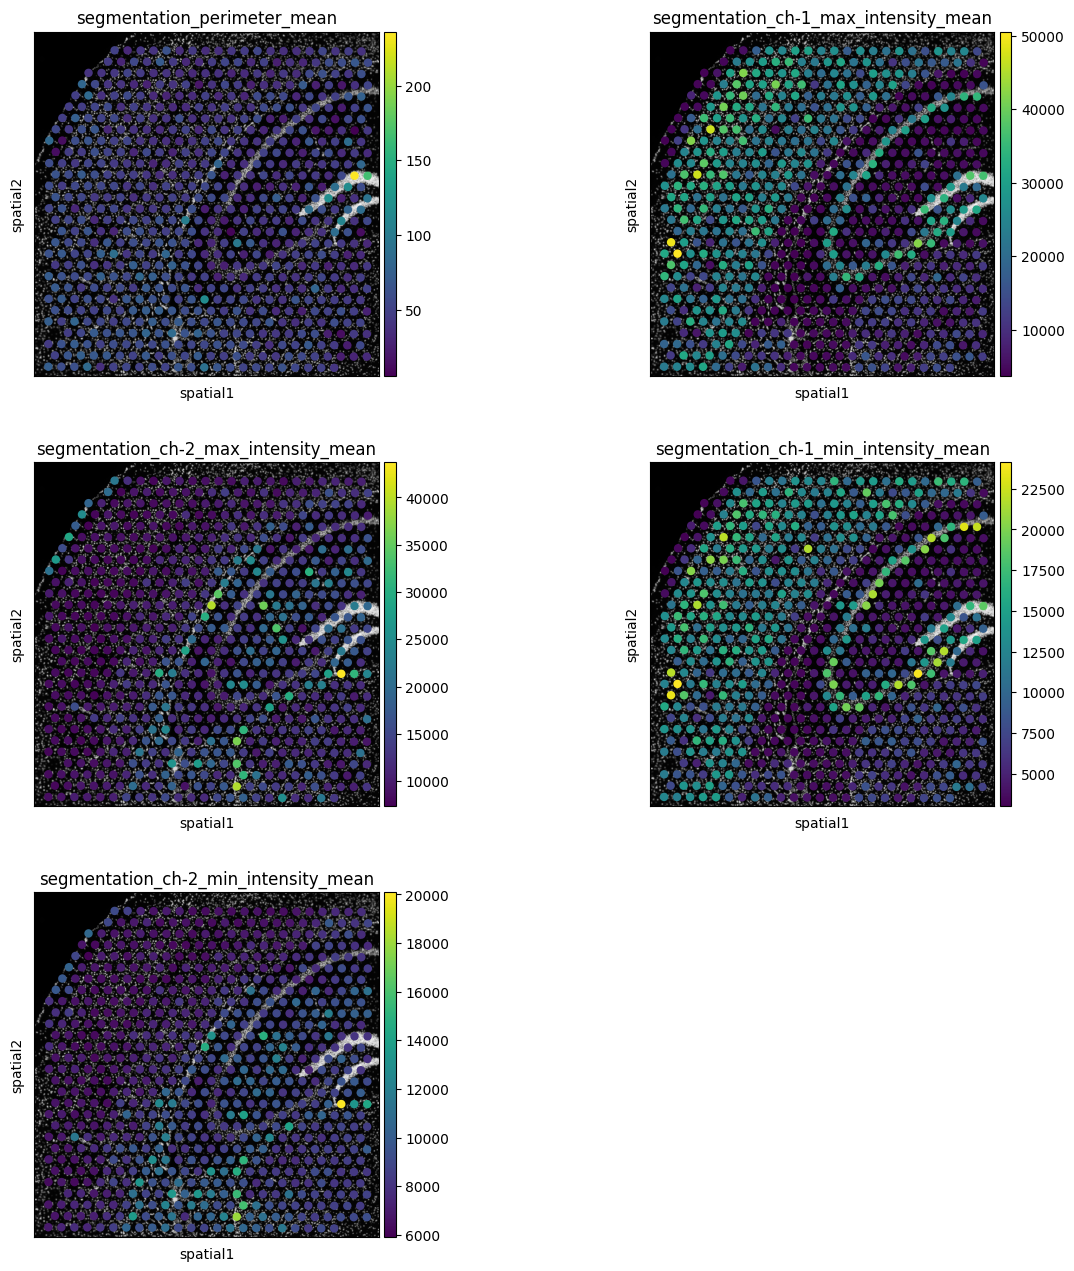

In [23]:
sq.pl.spatial_scatter(
    sq.pl.extract(adata, "segmentation_features2"),
    color=[
        "segmentation_perimeter_mean",
        "segmentation_ch-1_max_intensity_mean",
        "segmentation_ch-2_max_intensity_mean",
        "segmentation_ch-1_min_intensity_mean",
        "segmentation_ch-2_min_intensity_mean",
    ],
    img_cmap="gray",
    ncols=2,
)